<a href="https://colab.research.google.com/github/mimilazarova/DD2424-covid-xray-project/blob/master/playground_colab_mimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.metrics import confusion_matrix


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

with open('/content/drive/My Drive/Colab Notebooks/data/trainX1.pickle', 'rb') as f:
  X1 = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/data/trainX2.pickle', 'rb') as f:
  X2 = pickle.load(f)

trainX = np.concatenate((X1, X2))

with open('/content/drive/My Drive/Colab Notebooks/data/testX.pickle', 'rb') as f:
  testX = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/data/train_y.pickle', 'rb') as f:
  train_y = pickle.load(f)
with open('/content/drive/My Drive/Colab Notebooks/data/test_y.pickle', 'rb') as f:
  test_y = pickle.load(f)



In [8]:
class_weights = {}
for c in range(3):
  class_weights[c] = 1000/np.sum(train_y==c)
  print(class_weights[c])


0.12553351744915892
0.183452577508714
4.484304932735426


In [0]:
N = trainX.shape[0]
testN = testX.shape[0]

trainX = trainX.reshape((N, 224, 224, 1))
testX = testX.reshape((testN, 224, 224, 1))

In [11]:
model1 = keras.models.Sequential()
model1.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(224, 224, 1)))
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model1.add(layers.MaxPooling2D((4, 4)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(3))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 64)      640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [12]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history1 = model1.fit(trainX, train_y, epochs=25, 
                    validation_data=(testX, test_y))


Epoch 1/25
427/427 [==============================] - 33s 78ms/step - loss: 0.4776 - accuracy: 0.8065 - val_loss: 0.3730 - val_accuracy: 0.8550
Epoch 2/25
427/427 [==============================] - 33s 76ms/step - loss: 0.3869 - accuracy: 0.8535 - val_loss: 0.3616 - val_accuracy: 0.8623
Epoch 3/25
427/427 [==============================] - 32s 75ms/step - loss: 0.3487 - accuracy: 0.8673 - val_loss: 0.3281 - val_accuracy: 0.8768
Epoch 4/25
427/427 [==============================] - 32s 76ms/step - loss: 0.3062 - accuracy: 0.8861 - val_loss: 0.3097 - val_accuracy: 0.8914
Epoch 5/25
427/427 [==============================] - 32s 76ms/step - loss: 0.2800 - accuracy: 0.8960 - val_loss: 0.3295 - val_accuracy: 0.8854
Epoch 6/25
427/427 [==============================] - 32s 75ms/step - loss: 0.2567 - accuracy: 0.9069 - val_loss: 0.2707 - val_accuracy: 0.9060
Epoch 7/25
427/427 [==============================] - 32s 75ms/step - loss: 0.2330 - accuracy: 0.9142 - val_loss: 0.2619 - val_accuracy:

Confusion matrix:
[[796  83   6]
 [ 65 525   4]
 [  7   5  19]]


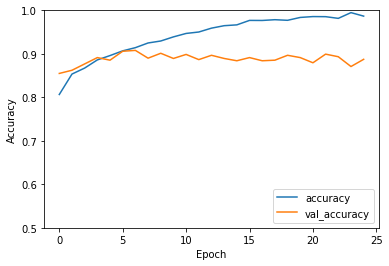

In [13]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model1.predict(testX)
test_y_pred1 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred1, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)

In [0]:
np.argmax(test_y_pred_m, axis=1)

In [0]:
# one-hot-encoded vectors, not sure it we need them, the fitting the models with them did not work for me

trainY = np.zeros((N, 3))
testY = np.zeros((testN, 3))

trainY[np.arange(N), train_y] = 1
testY[np.arange(testN), test_y] = 1


In [14]:
model2 = keras.models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(224, 224, 1)))
model2.add(layers.MaxPooling2D((4, 4)))
model2.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model2.add(layers.MaxPooling2D((4, 4)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(3))

class_weights = {}
for c in range(3):
  class_weights[c] = 1000/np.sum(train_y==c)
  print(class_weights[c])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


history2 = model2.fit(trainX, train_y, epochs=25, callbacks=[early_stopping],
                    class_weight=class_weights, validation_data=(testX, test_y))

Epoch 1/25
427/427 [==============================] - 32s 76ms/step - loss: 0.1975 - accuracy: 0.6450 - val_loss: 0.5721 - val_accuracy: 0.8152
Epoch 2/25
427/427 [==============================] - 32s 75ms/step - loss: 0.1638 - accuracy: 0.7303 - val_loss: 0.5990 - val_accuracy: 0.7974
Epoch 3/25
427/427 [==============================] - 32s 75ms/step - loss: 0.1561 - accuracy: 0.7463 - val_loss: 0.5656 - val_accuracy: 0.7907
Epoch 4/25
427/427 [==============================] - 32s 74ms/step - loss: 0.1342 - accuracy: 0.7775 - val_loss: 0.5541 - val_accuracy: 0.8000
Epoch 5/25
427/427 [==============================] - 32s 74ms/step - loss: 0.1221 - accuracy: 0.7911 - val_loss: 0.4897 - val_accuracy: 0.8212
Epoch 6/25
427/427 [==============================] - 32s 75ms/step - loss: 0.1077 - accuracy: 0.8057 - val_loss: 0.4883 - val_accuracy: 0.8139
Epoch 7/25
427/427 [==============================] - 32s 75ms/step - loss: 0.0986 - accuracy: 0.8172 - val_loss: 0.4138 - val_accuracy:

Confusion matrix:
[[814  61  10]
 [ 77 503  14]
 [  6   3  22]]


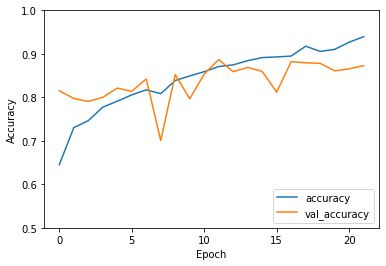

In [15]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model2.predict(testX)
test_y_pred2 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred2, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)


Epoch 1/25
427/427 [==============================] - 33s 76ms/step - loss: 0.6783 - accuracy: 0.7821 - val_loss: 0.4229 - val_accuracy: 0.8377
Epoch 2/25
427/427 [==============================] - 33s 76ms/step - loss: 0.5182 - accuracy: 0.8412 - val_loss: 0.3678 - val_accuracy: 0.8583
Epoch 3/25
427/427 [==============================] - 33s 76ms/step - loss: 0.4461 - accuracy: 0.8565 - val_loss: 0.3802 - val_accuracy: 0.8470
Epoch 4/25
427/427 [==============================] - 33s 76ms/step - loss: 0.3855 - accuracy: 0.8750 - val_loss: 0.3009 - val_accuracy: 0.8967
Epoch 5/25
427/427 [==============================] - 32s 76ms/step - loss: 0.3561 - accuracy: 0.8838 - val_loss: 0.3479 - val_accuracy: 0.8762
Epoch 6/25
427/427 [==============================] - 32s 76ms/step - loss: 0.3237 - accuracy: 0.8935 - val_loss: 0.3293 - val_accuracy: 0.8801
Epoch 7/25
427/427 [==============================] - 33s 77ms/step - loss: 0.2910 - accuracy: 0.9051 - val_loss: 0.4041 - val_accuracy:

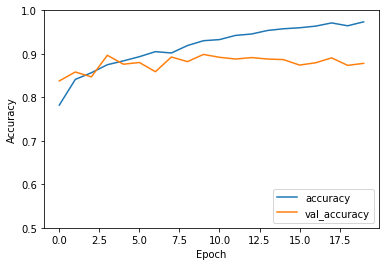

In [16]:
model3 = keras.models.Sequential()
model3.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(224, 224, 1)))
model3.add(layers.MaxPooling2D((4, 4)))
model3.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model3.add(layers.MaxPooling2D((4, 4)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(3))

class_weights = {}
class_weights[0] = 1
class_weights[1] = 1
class_weights[2] = 4

model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history3 = model3.fit(trainX, train_y, epochs=25, callbacks=[early_stopping],
                    class_weight=class_weights, validation_data=(testX, test_y))  

plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model3.predict(testX)
test_y_pred3 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred3, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)


0.12553351744915892
0.366905155017428
13.452914798206278
Epoch 1/25
427/427 [==============================] - 32s 76ms/step - loss: 0.4144 - accuracy: 0.2707 - val_loss: 0.8837 - val_accuracy: 0.6503
Epoch 2/25
427/427 [==============================] - 32s 75ms/step - loss: 0.3277 - accuracy: 0.5273 - val_loss: 0.9661 - val_accuracy: 0.6007
Epoch 3/25
427/427 [==============================] - 32s 76ms/step - loss: 0.2747 - accuracy: 0.6376 - val_loss: 0.7898 - val_accuracy: 0.7026
Epoch 4/25
427/427 [==============================] - 32s 76ms/step - loss: 0.2444 - accuracy: 0.6729 - val_loss: 0.8393 - val_accuracy: 0.6596
Epoch 5/25
427/427 [==============================] - 32s 75ms/step - loss: 0.2116 - accuracy: 0.7087 - val_loss: 0.6871 - val_accuracy: 0.7079
Epoch 6/25
427/427 [==============================] - 32s 75ms/step - loss: 0.1773 - accuracy: 0.7418 - val_loss: 0.7044 - val_accuracy: 0.7152
Epoch 7/25
427/427 [==============================] - 32s 75ms/step - loss: 0.1

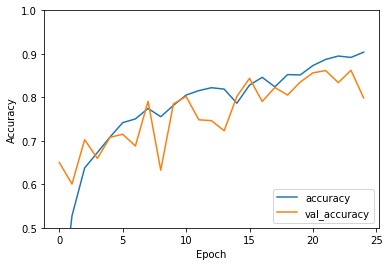

In [17]:
model4 = keras.models.Sequential()
model4.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(224, 224, 1)))
model4.add(layers.MaxPooling2D((4, 4)))
model4.add(layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model4.add(layers.MaxPooling2D((4, 4)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(3))

class_weights = {}
for c in range(3):
  class_weights[c] = 1000*(c+1)/np.sum(train_y==c)
  print(class_weights[c])


model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history4 = model4.fit(trainX, train_y, epochs=25, callbacks=[early_stopping],
                    class_weight=class_weights, validation_data=(testX, test_y))  

plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_y_pred_m = model4.predict(testX)
test_y_pred4 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred4, labels=[0, 1, 2])
print("Confusion matrix:")
print(conf_matrix)

